In [ ]:
#Install necessary libraries

!pip install kagglehub
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns
from kagglehub import KaggleDatasetAdapter
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#Fetch the train and test data from kaggle

Train_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "kaushiksuresh147/customer-segmentation",
  "Train.csv",)

Test_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "kaushiksuresh147/customer-segmentation",
  "Test.csv",)

In [4]:
#Merge the datasets as a single dataset

df = pd.concat([Train_df, Test_df], ignore_index = True)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [6]:
X = df.drop(columns=["ID", "Segmentation"])
y = df["Segmentation"]

In [7]:
#Make sure there is not a significant imbalance in the dataset

y.value_counts()

Segmentation
D    3027
A    2818
C    2442
B    2408
Name: count, dtype: int64

In [8]:
#Encode the labels into numerical values

labels = y.unique()
label_Encoder = LabelEncoder()
y = label_Encoder.fit_transform(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 42)

In [10]:
#Separate the columns based on numerical or categorical

numerical_features = X.select_dtypes(include = ["float64", "int64"]).columns.tolist()
categorical_features = X.select_dtypes(include = ["object"]).columns.tolist()

In [11]:
#Missing values in numerical columns will be imputed using the median followed by scaling of the values

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#Missing values in categorical columns will be imputed with the values that appear most frequently followed by one-hot encoding of the columns

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [12]:
#Combining the preprocessing pipelines under a single column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [13]:
#Model Pipeline using KNN

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [14]:
#Provide the parameters grid of the classifier

param_grid = {
    "classifier__n_neighbors": [4, 5, 6, 7, 8, 9, 10, 11, 12]
}

In [15]:
#Set up cross-validation

cv = StratifiedKFold(n_splits=5, shuffle=True)

In [16]:
#Use grid search to train the model using the different parameters and find the best parameters

model = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=2)
model.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..........................classifier__n_neighbors=4; total time=   0.2s
[CV] END ..........................classifier__n_neighbors=4; total time=   0.1s
[CV] END ..........................classifier__n_neighbors=4; total time=   0.0s
[CV] END ..........................classifier__n_neighbors=4; total time=   0.0s
[CV] END ..........................classifier__n_neighbors=4; total time=   0.0s
[CV] END ..........................classifier__n_neighbors=5; total time=   0.0s
[CV] END ..........................classifier__n_neighbors=5; total time=   0.0s
[CV] END ..........................classifier__n_neighbors=5; total time=   0.0s
[CV] END ..........................classifier__n_neighbors=5; total time=   0.0s
[CV] END ..........................classifier__n_neighbors=5; total time=   0.0s
[CV] END ..........................classifier__n_neighbors=6; total time=   0.0s
[CV] END ..........................classifier__n_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Work_Experience',
                                                                          'Family_Size']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Ever_Married',
                                                                          'Graduated',
                                                                          'Profession',
                                                                          'Spending_Score',
                                                                          'Var_1'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [4, 5, 6, 7, 8, 9, 10, 11,
                                                     12]},
             scoring='accuracy', verbose=2)

In [17]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.42      0.39       564
           1       0.32      0.27      0.29       482
           2       0.46      0.47      0.47       488
           3       0.56      0.54      0.55       605

    accuracy                           0.43      2139
   macro avg       0.43      0.42      0.42      2139
weighted avg       0.43      0.43      0.43      2139



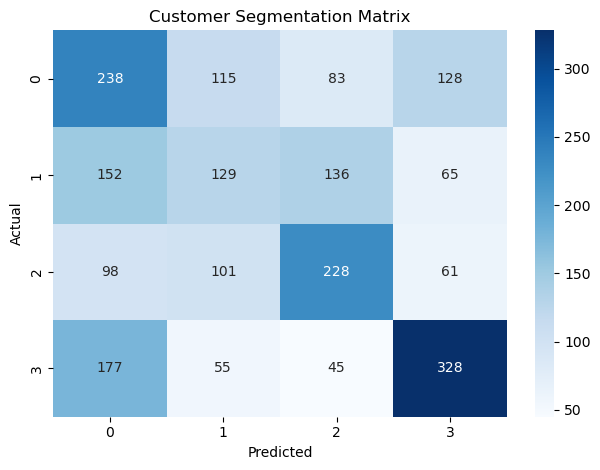

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.title('Customer Segmentation Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [19]:
#Now train using Random Forest

#Change model pipeline to use Random Forest, change the parameter grid to use parameters suitable for Random Forest and use the new pipeline

pipeline.set_params(classifier=RandomForestClassifier(random_state=42))

model.estimator = pipeline

param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
}

model.param_grid = param_grid

model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.7s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.7s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Work_Experience',
                                                                          'Family_Size']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most...uent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Ever_Married',
                                                                          'Graduated',
                                                                          'Profession',
                                                                          'Spending_Score',
                                                                          'Var_1'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [20]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.45      0.43       564
           1       0.36      0.27      0.30       482
           2       0.50      0.50      0.50       488
           3       0.55      0.61      0.58       605

    accuracy                           0.47      2139
   macro avg       0.46      0.46      0.45      2139
weighted avg       0.46      0.47      0.46      2139



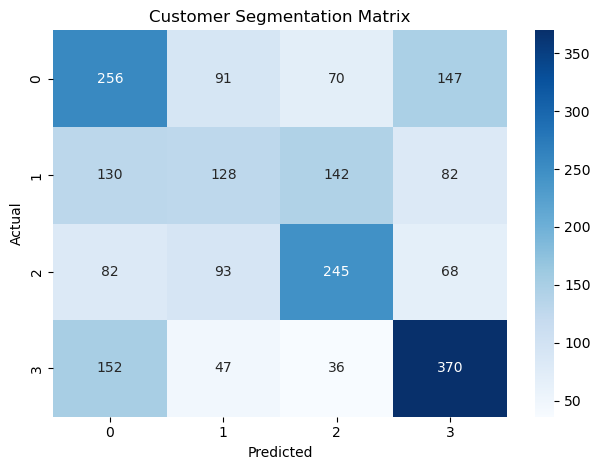

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.title('Customer Segmentation Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
